<a href="https://colab.research.google.com/github/Darshinirn/PROJECTS_darshini/blob/main/E_commerce_customer_Segementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# E-Commerce Customer Segmentation

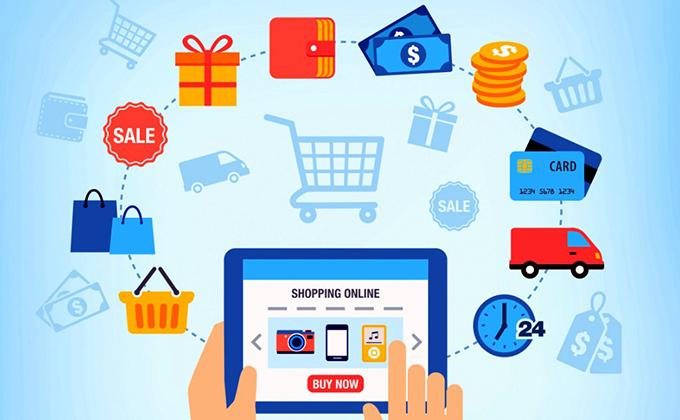




Running an eCommerce website is not always easy. There are sales to make, orders to fill, and payments to receive. This is why it is essential to make sure you have your bases covered when it comes to running a well-rounded website.So it is important to know the customer needs and improving the e commerce services and thereby fullfilling the needs of the customers.
This is a transnational data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers.

# Lets see the attributes

* InvoiceNo: Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation.
* StockCode: Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product.
* Description: Product (item) name. Nominal.
* Quantity: The quantities of each product (item) per transaction. Numeric.
* InvoiceDate: Invoice Date and time. Numeric, the day and time when each transaction was generated.
* UnitPrice: Unit price. Numeric, Product price per unit in sterling.
* CustomerID: Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer.


# Importing the libraries


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
import os


In [ ]:
df=pd.read_csv('/content/customer.csv')

In [ ]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
62546,541506,85231b,CINAMMON SET OF 9 T-LIGHTS,1,1/18/2011 16:05,1.63,NaN,United Kingdom
62547,541506,DOT,DOTCOM POSTAGE,1,1/18/2011 16:05,118.33,NaN,United Kingdom
62548,541507,22719,GUMBALL MONOCHROME COAT RACK,1,1/18/2011 16:05,2.46,NaN,United Kingdom
62549,541507,22807,SET OF 6 T-LIGHTS TOADSTOOLS,1,1/18/2011 16:05,5.79,NaN,United Kingdom


# DATA PREPROCESSING


The Column Quantity and UnitPrice can be used to create a new column called total price for the ease of analysis

In [ ]:
df['Totalprice'] = df['Quantity']* df['UnitPrice']

In [ ]:
df.describe()

,Quantity,UnitPrice,CustomerID,Totalprice
count,62551.000000,62551.000000,38501.000000,62551.000000
mean,8.352017,5.917925,15387.412379,17.240492
std,423.334622,149.003899,1765.391847,468.030059
min,-74215.000000,0.000000,12346.000000,-77183.600000
25%,1.000000,1.250000,13984.000000,3.360000
50%,2.000000,2.510000,15358.000000,8.260000
75%,8.000000,4.250000,17017.000000,16.940000
max,74215.000000,16888.020000,18283.000000,77183.600000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62551 entries, 0 to 62550
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   InvoiceNo    62551 non-null  object 
 1   StockCode    62551 non-null  object 
 2   Description  62388 non-null  object 
 3   Quantity     62551 non-null  int64  
 4   InvoiceDate  62551 non-null  object 
 5   UnitPrice    62551 non-null  float64
 6   CustomerID   38501 non-null  float64
 7   Country      62550 non-null  object 
 8   Totalprice   62551 non-null  float64
dtypes: float64(3), int64(1), object(5)
memory usage: 4.3+ MB


In [ ]:
df['Description'].isnull().value_counts()

False    62388
True       163
Name: Description, dtype: int64

The description have 117 null values,lets remove it using drop function




In [ ]:
df=df.dropna()
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
Totalprice     0
dtype: int64

Lets create a column for canceled orders


In [ ]:
df['canceled'] = ['C' in str(x) for x in df['InvoiceNo']]

In [ ]:

canceled_orders = df[df['canceled'] == True]
canceled_orders

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Totalprice,canceled
141,C536379,D,Discount,-1,12/1/2010 9:41,27.50,14527.0,United Kingdom,-27.50,True
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,12/1/2010 9:49,4.65,15311.0,United Kingdom,-4.65,True
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,12/1/2010 10:24,1.65,17548.0,United Kingdom,-19.80,True
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,12/1/2010 10:24,0.29,17548.0,United Kingdom,-6.96,True
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,12/1/2010 10:24,0.29,17548.0,United Kingdom,-6.96,True
...,...,...,...,...,...,...,...,...,...,...
62462,C541499,22766,PHOTO FRAME CORNICE,-1,1/18/2011 15:23,2.95,13693.0,United Kingdom,-2.95,True
62463,C541499,22325,MOBILE VINTAGE HEARTS,-3,1/18/2011 15:23,4.95,13693.0,United Kingdom,-14.85,True
62478,C541501,85118,HEART T-LIGHT HOLDER,-7,1/18/2011 15:26,1.25,13458.0,United Kingdom,-8.75,True
62479,C541502,22768,FAMILY PHOTO FRAME CORNICE,-1,1/18/2011 15:30,9.95,18190.0,United Kingdom,-9.95,True


Here we can see that the quantity is negative, so some cleaning is needed.Create a new data frame with non negative quantity .

In [ ]:
df_clean = df[df['Quantity'] >= 0]
df_clean

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Totalprice,canceled
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,15.30,False
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34,False
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,22.00,False
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34,False
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34,False
...,...,...,...,...,...,...,...,...,...,...
62504,541504,22690,DOORMAT HOME SWEET HOME BLUE,2,1/18/2011 15:37,7.95,14415.0,United Kingdom,15.90,False
62505,541504,20685,DOORMAT RED RETROSPOT,1,1/18/2011 15:37,7.95,14415.0,United Kingdom,7.95,False
62506,541504,20914,SET/5 RED RETROSPOT LID GLASS BOWLS,3,1/18/2011 15:37,2.95,14415.0,United Kingdom,8.85,False
62507,541504,20725,LUNCH BAG RED RETROSPOT,5,1/18/2011 15:37,1.65,14415.0,United Kingdom,8.25,False



# EXPLORATORY DATA ANALYSIS



# Mean Price VS country

In [ ]:
country_group = df_clean.groupby('Country')
mean_price_by_country = country_group['Totalprice'].mean()
print(mean_price_by_country)

Country
Australia           76.554344
Austria             34.650000
Belgium             19.532302
Channel Islands     21.384118
Cyprus              21.599192
Denmark             64.075000
EIRE                66.111005
Finland             52.517647
France              23.038056
Germany             25.392944
Iceland             22.960968
Italy               22.001455
Japan              118.539538
Lithuania           47.458857
Netherlands        126.977086
Norway              25.762721
Poland              26.102424
Portugal            28.488971
Spain               30.132121
Sweden             112.355385
Switzerland         26.631020
United Kingdom      23.785670
Name: Totalprice, dtype: float64


In [ ]:
country_group.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Totalprice,canceled
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,15.30,False
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34,False
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,22.00,False
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34,False
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34,False
...,...,...,...,...,...,...,...,...,...,...
34372,539338,22417,PACK OF 60 SPACEBOY CAKE CASES,240,12/17/2010 10:54,0.55,17404.0,Sweden,132.00,False
34373,539338,21977,PACK OF 60 PINK PAISLEY CAKE CASES,240,12/17/2010 10:54,0.55,17404.0,Sweden,132.00,False
37952,539491,21981,PACK OF 12 WOODLAND TISSUES,12,12/20/2010 10:09,0.29,14646.0,Netherlands,3.48,False
37953,539491,21986,PACK OF 12 PINK POLKADOT TISSUES,12,12/20/2010 10:09,0.29,14646.0,Netherlands,3.48,False


<Axes: xlabel='Country'>

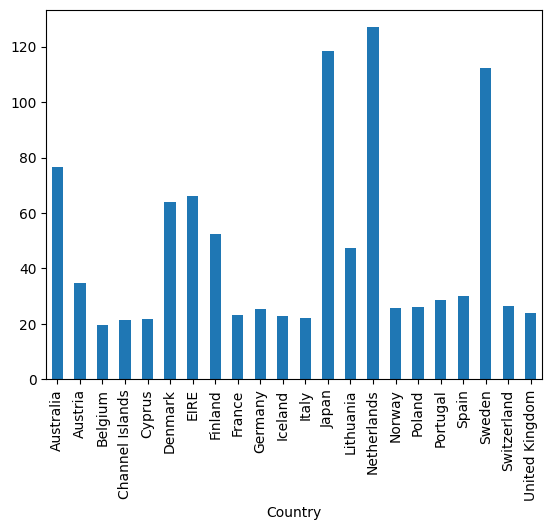

In [ ]:
mean_price_by_country.plot(kind='bar')

From this bargraph it is understood that the country Sweden have highest mean total price ,which means the ordered quantity is high from this country and second highest mean total price is for country japan.

2) Quantity VS count


<Axes: xlabel='Quantity', ylabel='count'>

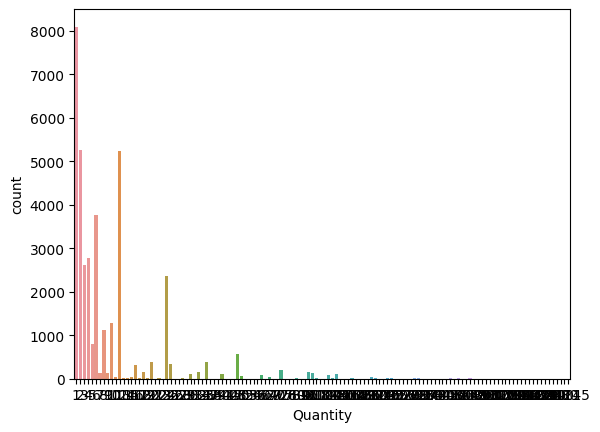

In [ ]:
sns.countplot(df_clean,x='Quantity')

3) Country VS quantity

<Axes: xlabel='Quantity', ylabel='Country'>

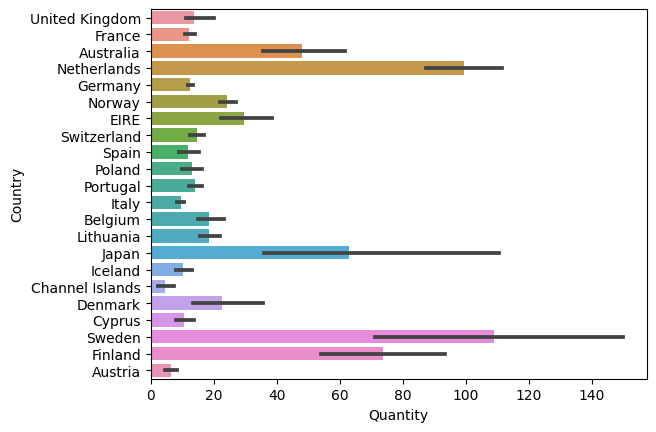

In [ ]:
sns.barplot(df_clean,x= 'Quantity',y='Country')

4) Top 10 countries VS total price

In [ ]:
df_countries = df_clean[['Country', 'Totalprice']]
df_countries = df_countries.groupby('Country').sum()
df_countries = df_countries.sort_values('Totalprice', ascending=False)
print(df_countries.head(10))

                Totalprice
Country                   
United Kingdom   802457.15
EIRE              26312.18
Germany           23031.40
France            19674.50
Netherlands       19173.54
Spain              9943.60
Australia          9339.63
Japan              7705.07
Portugal           5811.75
Sweden             4381.86


<Axes: xlabel='Totalprice', ylabel='Country'>

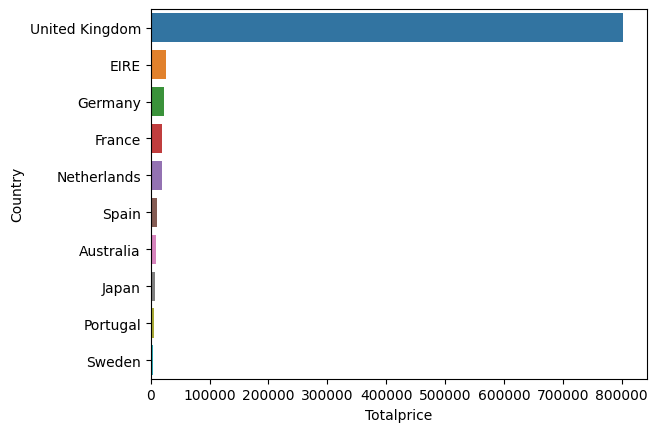

In [ ]:
sns.barplot(x='Totalprice', y='Country', data=df_countries.reset_index().head(10), orient='h')

#LETS ASK QUESTION AND PLOT

#   What is the average transaction value and quantity per transaction, and how do they vary by country?

Country
Netherlands    126.977086
Japan          118.539538
Sweden         112.355385
Australia       76.554344
EIRE            66.111005
Denmark         64.075000
Finland         52.517647
Lithuania       47.458857
Austria         34.650000
Spain           30.132121
Name: Totalprice, dtype: float64
Country
Sweden         108.897436
Netherlands     99.476821
Finland         73.764706
Japan           62.969231
Australia       48.090164
EIRE            29.706030
Norway          24.367347
Denmark         22.700000
Lithuania       18.628571
Belgium         18.611111
Name: Quantity, dtype: float64


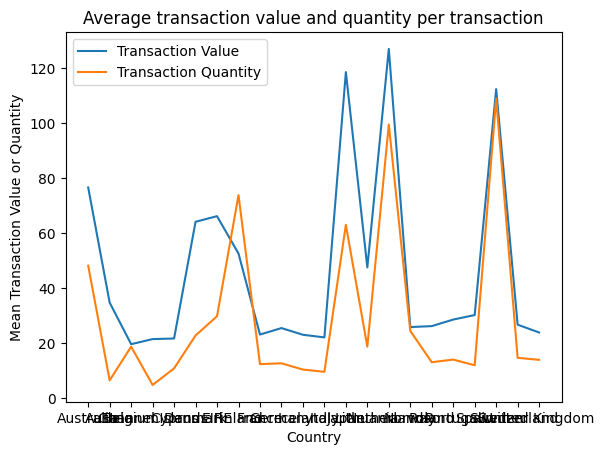

In [ ]:
mean_price_by_country = df_clean.groupby('Country')['Totalprice'].mean()
mean_quantity_by_country = df_clean.groupby('Country')['Quantity'].mean()
print(mean_price_by_country.sort_values(ascending=False).head(10))
print(mean_quantity_by_country.sort_values(ascending=False).head(10))
sns.lineplot(x=mean_price_by_country.index, y=mean_price_by_country.values, label='Transaction Value')
sns.lineplot(x=mean_quantity_by_country.index, y=mean_quantity_by_country.values, label='Transaction Quantity')
plt.title("Average transaction value and quantity per transaction")
plt.xlabel('Country')
plt.ylabel('Mean Transaction Value or Quantity')
plt.show()

#  Which products have the highest sales, and in which countries?

In [ ]:
product_sales_by_country = df_clean.groupby(['Description', 'Country'])['Totalprice'].sum()
print(product_sales_by_country.sort_values(ascending=False).head(10))

Description                         Country       
MEDIUM CERAMIC TOP STORAGE JAR      United Kingdom    77183.60
WHITE HANGING HEART T-LIGHT HOLDER  United Kingdom    21591.35
REGENCY CAKESTAND 3 TIER            United Kingdom    20190.60
CHILLI LIGHTS                       United Kingdom    10939.54
HEART OF WICKER LARGE               United Kingdom     7960.17
WOOD BLACK BOARD ANT WHITE FINISH   United Kingdom     7306.38
VINTAGE UNION JACK MEMOBOARD        United Kingdom     7057.89
FAIRY CAKE FLANNEL ASSORTED COLOUR  United Kingdom     6906.60
BLACK RECORD COVER FRAME            United Kingdom     6897.09
HEART OF WICKER SMALL               United Kingdom     6432.59
Name: Totalprice, dtype: float64


Text(0, 0.5, 'Total Sales')

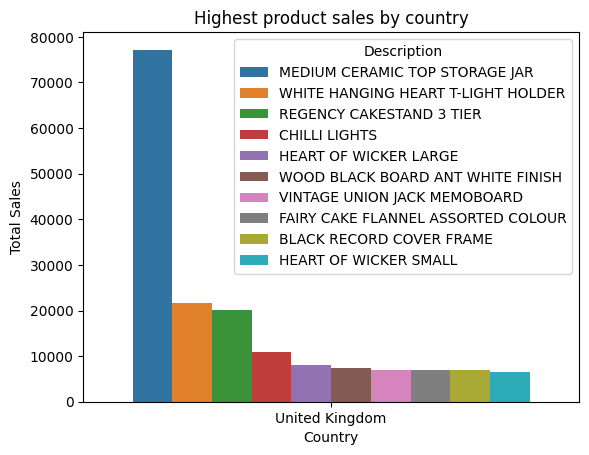

In [ ]:
top_products = product_sales_by_country.sort_values(ascending=False).head(10).reset_index()
sns.barplot(x='Country', y='Totalprice', hue='Description', data=top_products)
plt.title("Highest product sales by country")
plt.xlabel('Country')
plt.ylabel('Total Sales')

#  How does the number of transactions and total sales vary by country?

Country
United Kingdom    1765
Germany             45
France              40
EIRE                18
Spain                9
Portugal             9
Australia            9
Belgium              6
Lithuania            4
Netherlands          4
Name: InvoiceNo, dtype: int64
Country
United Kingdom    802457.15
EIRE               26312.18
Germany            23031.40
France             19674.50
Netherlands        19173.54
Spain               9943.60
Australia           9339.63
Japan               7705.07
Portugal            5811.75
Sweden              4381.86
Name: Totalprice, dtype: float64
Country
United Kingdom    1765
Germany             45
France              40
EIRE                18
Spain                9
Portugal             9
Australia            9
Belgium              6
Lithuania            4
Netherlands          4
Name: InvoiceNo, dtype: int64
Country
United Kingdom    802457.15
EIRE               26312.18
Germany            23031.40
France             19674.50
Netherlands        1917

Text(0.5, 1.0, 'Total Sales by Country')

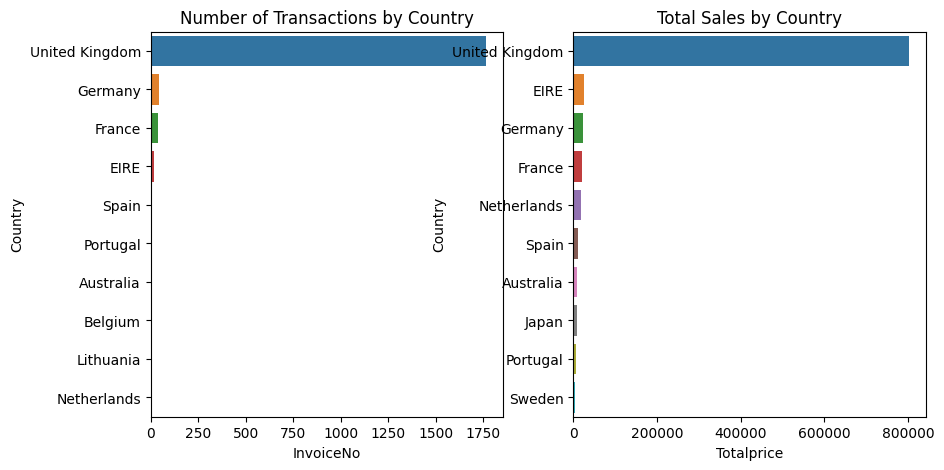

In [ ]:
num_transactions_by_country = df_clean.groupby('Country')['InvoiceNo'].nunique()
total_sales_by_country = df_clean.groupby('Country')['Totalprice'].sum()
print(num_transactions_by_country.sort_values(ascending=False).head(10))
print(total_sales_by_country.sort_values(ascending=False).head(10))
print(num_transactions_by_country.sort_values(ascending=False).head(10))
print(total_sales_by_country.sort_values(ascending=False).head(10))
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
sns.barplot(x=num_transactions_by_country.sort_values(ascending=False).head(10), y=num_transactions_by_country.sort_values(ascending=False).head(10).index, ax=ax[0], orient='h')
ax[0].set_title("Number of Transactions by Country")
sns.barplot(x=total_sales_by_country.sort_values(ascending=False).head(10), y=total_sales_by_country.sort_values(ascending=False).head(10).index, ax=ax[1], orient='h')
ax[1].set_title("Total Sales by Country")


# DATA MODELING USING RANDOMFOREST


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor